# Test of JupterLab for lectures/course work

Required for installation: 
- Anaconda 


More text ...

Config file ...

#### Initialization of libraries and programs

In [28]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import mpl_toolkits
import pandas as pd 
import netCDF4
import os
os.environ['PROJ_LIB'] = 'C:/Users/renee/anaconda3/Lib/site-packages/mpl_toolkits/basemap'
from mpl_toolkits.basemap import Basemap 
from mpl_toolkits.axes_grid1 import ImageGrid
from scipy.interpolate import griddata
from scipy import stats
from matplotlib.patches import Wedge
import proplot as plot
import pyproj
from astropy.time import Time 
import h5py
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
from netCDF4 import Dataset,num2date
from mpl_toolkits.basemap import Basemap
from itertools import chain
import sys
import copy 
import glob


# Say, "the default sans-serif font is COMIC SANS"
mpl.rcParams['font.sans-serif'] = "Arial"
# Then, "ALWAYS use sans-serif fonts"
mpl.rcParams['font.family'] = "sans-serif"

#### Defined functions

In [22]:
def load_data(path, fp, lon_var, lat_var, wf_var, coh_var, ph_diff_var):
    nc_file = netCDF4.Dataset(path + '/' + fp, 'r')
    lon = nc_file.variables[lon_var][:]
    lat = nc_file.variables[lat_var][:]
    wf = nc_file.variables[wf_var][:]
    coh_wf = nc_file.variables[coh_var][:]
    ph_diff_wf = nc_file.variables[ph_diff_var][:]
    
    return  lon, lat, wf, coh_wf, ph_diff_wf

In [31]:
nc_dir = "./data/"
nc_files = glob.glob(nc_dir+"*.nc")
nc_files

[]

In [37]:
os.listdir()

['.ipynb_checkpoints']

## Load data

In [34]:
path = "Documents/GitHub/JupyterNotebook_examples/data"

fp = 'CS_OFFL_SIR_SIN_1B_20220406T191539_20220406T192029_E001.nc'
lon, lat, wf, coh_wf, ph_diff_wf = load_data(path, fp, 'lon_20_ku', 'lat_20_ku', 'pwr_waveform_20_ku', 'coherence_waveform_20_ku','ph_diff_waveform_20_ku')
df_CS2b = pd.DataFrame({'lat':lat, 'lon':lon})
df_CS2b = df_CS2b[(df_CS2b['lat']>82)].reset_index()

FileNotFoundError: [Errno 2] No such file or directory: b'Documents/GitHub/JupyterNotebook_examples/data/CS_OFFL_SIR_SIN_1B_20220406T191539_20220406T192029_E001.nc'

## Plot example of waveforms, coherence waveform and phase difference waveform

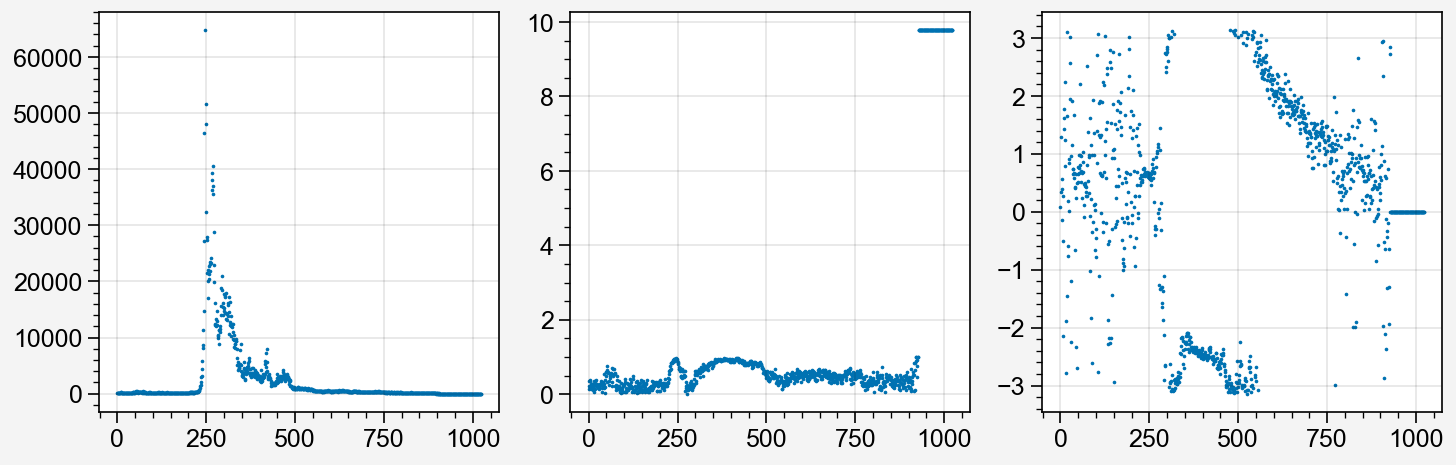

In [8]:
fig, axs = plot.subplots([[1,2,3]], share=0, axwidth=2, axheight=2)
fig.patch.set_facecolor('white')

ax=axs[0]
n=150
n_s = 0.5
ax.scatter(wf[n], s=n_s)

ax=axs[1]
ax.scatter(coh_wf[n], s=n_s)
#ax.format(ylim=[0,1])

ax=axs[2]
ax.scatter(ph_diff_wf[n], s=n_s)

## Plot geographic location of data

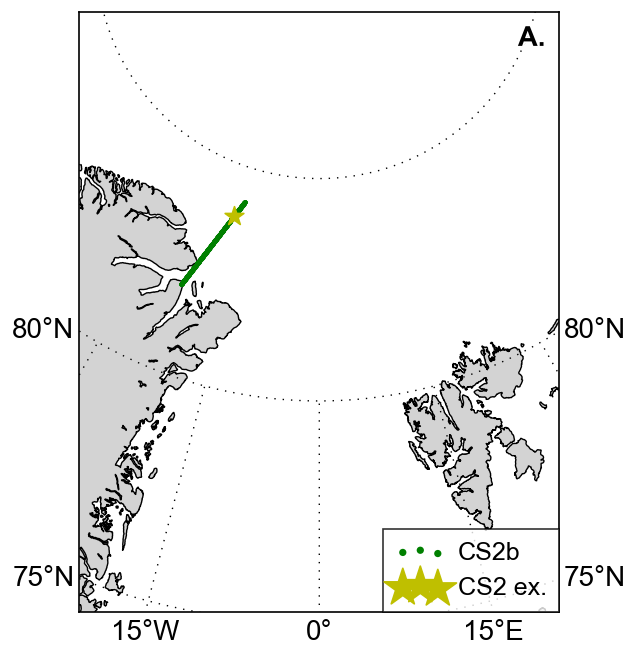

In [9]:

fig, axs = plot.subplots([[1]], share=0, axwidth=3, axheight=3)
fig.patch.set_facecolor('white')


ax = axs[0]

x1 = -15
x2 = 15
y1 = 60
y2 = 90

title='CryoVEx 2022 DOY 086: IS2 and Airborne'
m = Basemap(width=1200000,height=1500000,resolution='h',projection='laea',lat_1=73.,lat_0=82,lon_0=0, ax=ax)
#m = Basemap(projection='npstere', llcrnrlat=y1,urcrnrlat=y2,llcrnrlon=x1,urcrnrlon=x2,boundinglat=70,lon_0=0, resolution='l',ax=ax)
m.drawmeridians(np.arange(0,360,15),labels=[0,0,0,1],linewidth=0.5, fontsize=10, dashes=[1,5])
m.drawparallels(np.arange(-90,90,5),linewidth=0.5, fontsize=10, dashes=[1,5],labels=[1,1,0,0])
m.drawcoastlines(linewidth=0.5)
m.fillcontinents(color='lightgray')
x=m.scatter(np.array(df_CS2b['lon']), np.array(df_CS2b['lat']), c='g', latlon=True, s=1, marker = "o", zorder=3, label = 'CS2b')

n = 150
x=m.scatter(np.array(lon[n]), np.array(lat[n]), c='y', latlon=True, s=50, marker = "*", zorder=4, label = 'CS2 ex.')

ax.legend(loc='lr', ncols=1, scatterpoints=3, markerscale=2)



fig.format(abc='A.', abcloc="ur")
